In [ ]:
# Import Libraries
import torch
import torch.nn as nn
import torchvision
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

For this assignment, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

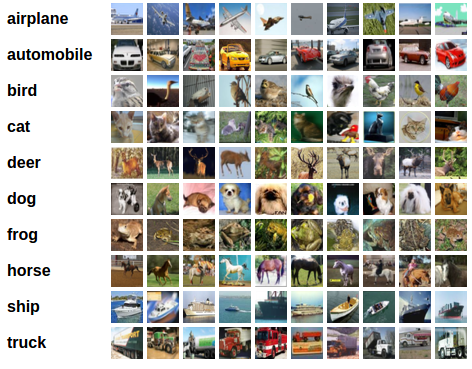

   cifar10


In [ ]:
# Prepare Dataset
# load data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0, 0, 0), (1, 1, 1))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


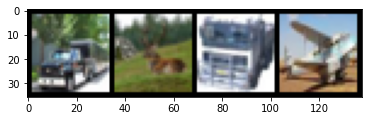

truck deer  truck plane


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0, 0, 0), std=(1, 1, 1))
           )

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
trainset

<a id="4"></a> <br>
### Artificial Neural Network (ANN)
- **Steps of ANN:**
    1. Import Libraries
    1. Prepare Dataset
    1. Create ANN Model
        - We add 3 hidden layers.
        - We use ReLU, Tanh and ELU activation functions for diversity.
    1. Instantiate Model Class
        - input_dim = 32*32*3 # size of image px*px*channel
        - output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9 
        - create model
    1. Instantiate Loss
        - Cross entropy loss
        - It also has softmax(logistic function) in it.
    1. Instantiate Optimizer
        - SGD Optimizer
    1. Traning the Model
    1. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy is increasing and our model is learning(training). 
- Thanks to hidden layers model learnt better and accuracy(almost 95%) is better than accuracy of logistic regression model.

In [ ]:
#### start code here ####
import tensorflow as tf
# set the device on which the model will be trained
device = torch.device('cuda')
#### end code here ####
print(device)

cuda


![ffnn](https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Multi-Layer_Neural_Network-Vector-Blank.svg/400px-Multi-Layer_Neural_Network-Vector-Blank.svg.png)

Conceptually, you think of feedforward neural networks as two or more linear regression models stacked on top of one another with a non-linear activation function applied between them.

<!-- <img src="https://cdn-images-1.medium.com/max/1600/1*XxxiA0jJvPrHEJHD4z893g.png" width="640"> -->

![img](https://www.researchgate.net/profile/Junxi-Feng/publication/335845675/figure/fig3/AS:804124836765699@1568729709680/Commonly-used-activation-functions-a-Sigmoid-b-Tanh-c-ReLU-and-d-LReLU.ppm)
To use a feedforward neural network instead of linear regression, we can extend the `nn.Module` class from PyTorch.

In [ ]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        
        #### start code here ####
        super(ANNModel,self).__init__()
        self.inp_to_hid1=nn.Linear(input_dim,hidden_dim)
        self.relu = nn.ReLU()
        self.hid1_to_hid2=nn.Linear(hidden_dim,hidden_dim)
        self.tanh = nn.Tanh()
        self.hid2_to_hid3=nn.Linear(hidden_dim,hidden_dim)
        self.elu = nn.ELU()
        self.hid3_to_out = nn.Linear(hidden_dim,output_dim)

        #### end code here ####
    
    def forward(self, x):
        
        #### start code here ####
        out=self.inp_to_hid1(x)
        out=self.relu(out)
        out=self.hid1_to_hid2(out)
        out=self.tanh(out)
        out=self.hid2_to_hid3(out)
        out=self.elu(out)
        out=self.hid3_to_out(out)
        return out
        #### end code here ####

#### start code here ####
# instantiate ANN
input_dim = 32*32*3
hidden_dim = 1000 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned.
output_dim =10

#### end code here ####

In [ ]:
# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim).to(device)
model

ANNModel(
  (inp_to_hid1): Linear(in_features=3072, out_features=1000, bias=True)
  (relu): ReLU()
  (hid1_to_hid2): Linear(in_features=1000, out_features=1000, bias=True)
  (tanh): Tanh()
  (hid2_to_hid3): Linear(in_features=1000, out_features=1000, bias=True)
  (elu): ELU(alpha=1.0)
  (hid3_to_out): Linear(in_features=1000, out_features=10, bias=True)
)

In [ ]:
# print the number of trainable parameters
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("number of parameters/weights ", pytorch_total_params)

number of parameters/weights  5085010


In [ ]:
# Cross Entropy Loss 
#### start code here ####
error = nn.CrossEntropyLoss() #loss
#### end code here ####

Cross Entropy Loss

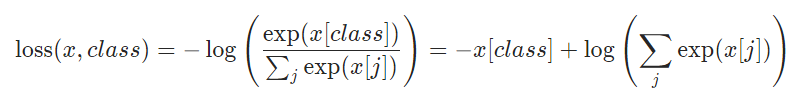

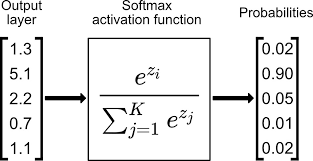

**x = [0, 0, 0, 1]** and **class = 3**

`loss(x, class) = -1 + log(exp(0) + exp(0) + exp(0) + exp(1))`</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`= 0.7437`

In [ ]:
# Optimizer
#### start code here ####
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
#### end code here ####

<img src="https://i.imgur.com/g7Rl0r8.png" width="500">

In [ ]:
# ANN model training
from tqdm.notebook import tqdm
#### start code here ####
num_epochs = 50
#### end code here ####
loss_list = []
accuracy_list = []
for epoch in tqdm(range(num_epochs)):
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(trainloader): # 4

        #### start code here ####
        # load the dataset into device
        images = images.reshape(-1,32*32*3).to(device)
        labels = labels.to(device)
        
        # Forward propagation 
        outputs = model(images)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs,labels)
        
        # Calculating gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Update parameters
        


        # Clear gradients

        #### end code here ####

        # Calculate Accuracy         
        predicted = torch.max(outputs.data, 1)[1] 
        
        # Total number of labels
        total += len(labels)

        # Total correct predictions
        correct += (predicted == labels).sum().to("cuda")

    accuracy = 100 * correct / float(total)
        
    # store loss and iteration
    loss_list.append(loss.to('cpu').data)
    accuracy_list.append(accuracy.cpu())

    print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(epoch, loss.data, accuracy))

  0%|          | 0/50 [00:00<?, ?it/s]

Iteration: 0  Loss: 1.5938525199890137  Accuracy: 33.54399871826172 %
Iteration: 1  Loss: 1.2111546993255615  Accuracy: 40.77399826049805 %
Iteration: 2  Loss: 2.2721080780029297  Accuracy: 44.183998107910156 %
Iteration: 3  Loss: 1.1530417203903198  Accuracy: 46.13399887084961 %
Iteration: 4  Loss: 0.6772575378417969  Accuracy: 47.555999755859375 %
Iteration: 5  Loss: 1.481661081314087  Accuracy: 49.205997467041016 %
Iteration: 6  Loss: 2.100836753845215  Accuracy: 50.33399963378906 %
Iteration: 7  Loss: 1.862313985824585  Accuracy: 51.48999786376953 %
Iteration: 8  Loss: 1.7307019233703613  Accuracy: 52.78999710083008 %
Iteration: 9  Loss: 0.8292394876480103  Accuracy: 53.75600051879883 %
Iteration: 10  Loss: 1.157603144645691  Accuracy: 54.599998474121094 %
Iteration: 11  Loss: 0.4494950473308563  Accuracy: 55.599998474121094 %
Iteration: 12  Loss: 1.3316774368286133  Accuracy: 56.507999420166016 %
Iteration: 13  Loss: 0.7788692712783813  Accuracy: 57.15599822998047 %
Iteration: 14 

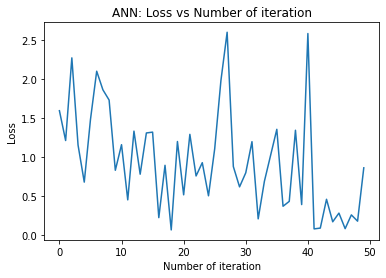

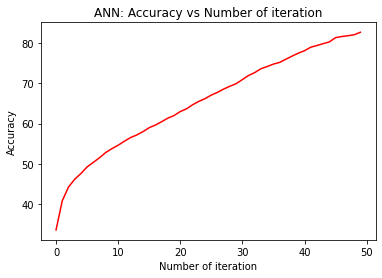

In [ ]:
# visualization loss 
plt.plot(range(num_epochs),loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(range(num_epochs),accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.reshape(-1,3*32*32).to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        predictions = predictions.to("cpu")
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

score = 0

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    score = score + accuracy
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 72.5 %
Accuracy for class: car   is 69.4 %
Accuracy for class: bird  is 40.4 %
Accuracy for class: cat   is 30.8 %
Accuracy for class: deer  is 50.3 %
Accuracy for class: dog   is 42.6 %
Accuracy for class: frog  is 50.4 %
Accuracy for class: horse is 63.7 %
Accuracy for class: ship  is 51.2 %
Accuracy for class: truck is 52.3 %


In [ ]:
print(f"your score {score}")

your score 523.6
